# Homework 2 Part 1

## Course Name: Large Language Models
#### Lecturers: Dr. Soleimani, Dr. Rohban, Dr. Asgari

---

#### Notebooks Supervised By: MohammadAli SadraeiJavaheri, Omid Ghahroodi
#### Notebook Prepared By: Omid Ghahroodi

**Contact**: Ask your questions in Quera

---

### Instructions:
- Complete all exercises presented in this notebook.
- Ensure you run each cell after you've entered your solution.
- After completing the exercises, save the notebook and <font color='red'>follow the submission guidelines provided in the PDF.</font>


---

**Note**: Replace the placeholders (between <font color="green">`## Your code begins ##`</font> and <font color="green">`## Your code ends ##`</font>) with the appropriate details.


## 1. Introduction

In this notebook, you will learn about data preprocessing for training a large language model and tokenizers.

In this notebook first, you download the raw data, then implement a pipeline for preprocessing this data. Finally, you train the three different types of tokenizers that you learned in the class on your data and compare them.

Answer the questions marked in green font.


In [ ]:
# Note: Do NOT make changes to this block.

!pip install transformers
!pip install fasttext
!pip install hazm


from IPython.display import clear_output
from huggingface_hub import hf_hub_download
from tqdm.notebook import tqdm
import numpy as np
import random
import transformers
import gzip
import json
import fasttext
from hazm import *

normalizer = Normalizer()

SEED=21

np.random.seed(SEED)
random.seed(SEED)

clear_output()

### Download Raw Data

In this section, download the raw data.

In [ ]:
# Note: Do NOT make changes to this block.

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/allenai/c4
%cd c4
!git lfs pull --include "c4-fa.tfrecord-00000-of-01024.json.gz"
%cd ..

file_path = '/content/c4/multilingual/c4-fa.tfrecord-00000-of-01024.json.gz'

with gzip.open(file_path, 'rb') as f:
    file_content = f.read().decode('utf8')

data = file_content.split('\n')

text_data = []

for i in data:
    if i!='':
        text_data.append(json.loads(i)['text'])

!wget https://raw.githubusercontent.com/roshan-research/hazm/master/hazm/data/stopwords.dat
with open('stopwords.dat', 'r') as f:
    stop_words = f.read()
stop_words = stop_words.rstrip()
stop_words = stop_words.split('\n')

clear_output()

### Statistics (5 points)

In this section, you should report several statistical characteristics of the data:
- Average length of the documents
- Largest length of the documents
- Smallest length of the documents
- The number of words in the data
- The most frequent word

In [ ]:
## Your code begins ##
stat = np.array([len(data.split()) for data in text_data])
av_len = int(stat.mean())
lg_len = stat.max()
sm_len = stat.min()
num_words = stat.sum()
print(f'Average length of the documents : {av_len} tokens')
print(f'Largest length of the documents : {lg_len} tokens')
print(f'Smallest length of the documents : {sm_len} tokens')
print(f'The number of words in the data : {num_words} tokens')


from collections import Counter

def get_most_frequent_words(text_data, top_n):
    combined_text = ' '.join(text_data)
    words = combined_text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(top_n)
    return most_common_words

top_words = get_most_frequent_words(text_data, top_n=1)
for word, count in top_words:
    print(f"The most frequent word : {word} with {count} times frequency")
## Your code ends ##

Average length of the documents : 488 tokens
Largest length of the documents : 32467 tokens
Smallest length of the documents : 1 tokens
The number of words in the data : 25726971 tokens
The most frequent word : و with 1026606 times frequency


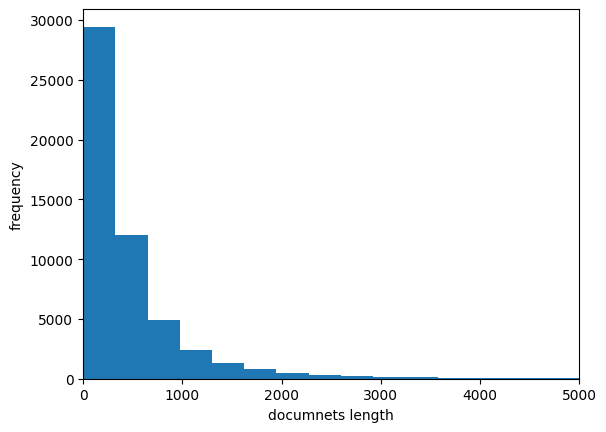

In [ ]:
import matplotlib.pyplot as plt
plt.hist(stat, bins=100)
plt.xlim(0,5000)
plt.xlabel('documnets length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# Note: Do NOT make changes to this block.
# Note: Do NOT change orginal_text_data

orginal_text_data = text_data[:]
len(orginal_text_data)


52663

### Low-quality Examples

In this section, several examples of poor-quality data from each category are provided. At the end of the preprocessing pipeline, you must remove such data from the original dataset to obtain high-quality data.

In [ ]:
# Note: Do NOT make changes to this block.

non_persian_example = orginal_text_data[9]
print(non_persian_example)


آذر ۷, ۱۳۹۷ - دیمه نیوز
Sportsbook Sites and Football Wagering Tips
Football gambling on tips-football playing advice on line The This country's Bookie Sportsbook, as a good useful support, delivers this kind of perceptive sections technique side bet your preferred sporting such as hockey, soccer, basketball game, tennis, sports, moose race, NASCAR, rugby, plus world of golf. Family home " Much more " Sports Bets ...
Major Business Strategies Selections Your solution to organization will most likely be influenced by the end objective. Then you can observe how without problems you operate your organization with low concerns in the foreseeable future. No matter of what topic you select to your new marketing and advertising business, ...
Top rated Business Strategies Options Your approach to organization is to damaged by the end target. Then you are going to observe how easily you run your company with very minimal issues down the road. Irrespective of what issue you select to your new on

In [ ]:
# Note: Do NOT make changes to this block.

short_length_example = orginal_text_data[1494]
print(short_length_example)


﻿ ﻿ مرجع آموزش زبان ایرانیان - _دانلود_نرم_افزار_سطح_مقدماتی_Oxford_Word_Skills_Basic_ ﻿


In [ ]:
# Note: Do NOT make changes to this block.

mean_length_word_example = orginal_text_data[250]
print(mean_length_word_example)


دو جمله حکیمانه : روانشناسی و اعتیاد - Page 9
159 پست • صفحه 9 از 11 • 1 ... 6, 7, 8, 9, 10, 11
[ 접속주소:opxx3.COM] &rdquo;&rdquo; 안동 섹시 &rdquo;&rdquo;
توسط 97WzugSKd3 » 6 مرداد 1397, 22:27
 [opxx3.COM]  &rdquo;☚&rdquo; 고양 강남 출장 만남 &there4;
توسط VTR8ve0Hhj » 6 مرداد 1397, 00:36
URL &rarr; [opxx3.COM] &rdquo;&rdquo; 김포 출장샵 &rdquo;✌&r
توسط PjTf4lb7wh » 6 مرداد 1397, 00:39
[opxx3.COM] &rdquo;&rdquo; 경주 출장안마 ※
توسط 97WzugSKd3 » 7 مرداد 1397, 06:02
[ 접속주소:opxx3.COM] &rdquo;&rdquo; 김천 서비스 &rdquo;&rdquo;
توسط rH7yB6bGKL » 7 مرداد 1397, 08:18
[opxx3.COM] &rdquo;&rdquo; 김천 콜걸 &rdquo;&rdquo;
توسط J5HDhyr3Hc » 7 مرداد 1397, 08:18
[opxx3.COM] &rdquo;&rdquo; 포항 강남 출장 아로마 &rdquo;&rdquo;
توسط J5HDhyr3Hc » 7 مرداد 1397, 08:20
WEBSITE  [opxx3.COM]  ※ 남양주 부평 출장 &rdquo;☚&rdquo;
توسط 97WzugSKd3 » 7 مرداد 1397, 12:23
[url=ï»¿https://stackoverflow.com/search?q=%F0%9F%8C%8F%20%5Bopxx3.COM%5D%20%F0%9F%8C%8F%2B%E2%80%9D%E2%9C%8C%E2%80%9D%2B%E2%80%9D%F0%9F%A4%A3%E2%80%9D%2B%E2%80%9D%F0%9F%8D%94%E2%8

In [ ]:
# Note: Do NOT make changes to this block.

symbol_ration_example = orginal_text_data[15018]
print(symbol_ration_example)


آموزش اضافه کردن تب های admincp و modcp به وی بی ایران خوش آمدید
ثبت نام کنید یا وارد شوید صفحه اصلی سایت مقالات رسانه تصویری آپلودسنتر فروشگاه دانلودر پست های جدید پرسش و پاسخ تقویم ابزار انجمن انتخاب بعنوان خوانده شده کلیدهای میانبر ارسال های امروز نمایش مدیران انجمن User Tagging Statistics Hash Tag Subscriptions وی بولتین مقالات آموزش اضافه کردن تب های admincp و modcp تاپیک به صورت خودکار بعد از 5 ثانیه آپدیت میشود بنابراین برای نمایش پست های جدید نیازی به رفرش صفحه نیست حالت ریفرش اتوماتیک به علت بی توجهی شما به این صفحه غیر فعال شد . «روشن کردن ریفرش اتوماتیک»
مقاله: آموزش اضافه کردن تب های admincp و modcp لینک بک آدرس لینک بک درباره لینک بک ها اضافه کردن به علاقه مندی / اشتراک فرستادن این موضوع به Digg !اضافه کردن موضوع به Delicious !اضافه کردن به علاقه مندی تکنوراتیفرستادن موضوع به Twitter ! ابزار مقاله پرینت این صفحه / حالت نمایش بصورت پرینت شده ارسال این صفحه به ایمیل یک دوست یا خودتان… Subscribe to this Article… نحوه نمایش موضوع حالت خطی تعویض به حالت ترکیبی تعوض به حالت رشته

In [ ]:
# Note: Do NOT make changes to this block.

alphabet_example = orginal_text_data[1]
print(alphabet_example)


املاک -- مشاهده تمام آگهی های دسته -- اجاره املاک اداری تجاری تهران ( 3) اجاره املاک مسکونی تهران ( 2) خرید و فروش آپارتمان ( 21) خرید و فروش املاک اداری تجاری تهران ( 3) خرید و فروش املاک مسکونی تهران ( 1) خرید و فروش خانه ( 3) خرید و فروش زمین ( 5) رهن و اجاره آپارتمان ( 5) رهن و اجاره خانه ( 1) سایر ( 9) کلنگی ( 2) مغازه و غرفه ( 3) ویلا ( 1) کالاو لوازم -- مشاهده تمام آگهی های دسته -- اثاثیه منزل ( 14) اداری ( 11) الکترونیک و دیجیتال ( 23) ایمنی ( 0) -- دوربین مدار بسته بازی و سرگرمی ( 1) برقی و گازی ( 12) بهداشتی ساختمان ( 9) بهداشتی و آرایشی ( 20) پزشکی ( 28) پوشاک ( 14) تزئینی , پرده , کرکره و ... ( 8) تزیینی ( 12) تعمیرگاهی ( 0) چوبی و فلزی ( 6) خیاطی و بافندگی ( 2) رستوران و فست فود ( 5) زیور آلات ( 1) ساعت ( 0) سایر ( 29) سرمایشی و گرمایشی ( 4) سیسمونی و نوزاد ( 0) شکار و ماهیگیری ( 1) صنعتی ( 5) صوتی و تصویری ( 9) عینک ( 0) فرش و زیر انداز ( 1) فیلم برداری و عکاسی ( 0) کالا و تجهیزات برقی ( 6) کتاب و مجلات ( 4) کیف و کفش ( 0) لوازم التحریر ( 1) لوازم ساختمانی ( 19) لوازم فرو

In [ ]:
# Note: Do NOT make changes to this block.

stopword_example = orginal_text_data[74]
print(stopword_example)

بقشاب پرنده های زیر آبی :: پنجره ی جهان نما
بقشاب پرنده های زیر آبی
چهارشنبه, ۱ مرداد ۱۳۹۳، ۰۷:۵۷ ب.ظ
منبع : مجله ی اینترنتی دانستنیها


## 2. Preprocessing (85 points)

In this part, you have to implement the pre-processing pipeline. This pipeline consists of the following sections:

1- Language Identification: In this section, you need to identify the language of the data using FastText and remove any data that is not in Farsi.

2- Length Filter: It is likely that examples that are shorter or longer than one length do not contain complete sentences or textual data. In this section, you should remove this data.

3- Mean Word Length: In high quality text, words should have an average number of characters within a certain range. you should find the average word length in each sample and exclude samples that fall outside the range.

4- Symbol Ratio: To ensure that a text is of good quality for training a model, the ratio of symbol count to word count should not exceed the threshold. In this task, you should calculate the ratio of symbol count to word count in any samples and filter out any samples with a ratio above a certain threshold.

5- Alphabetic Filter: In this part, you need to find the ratio of the number of words that contain at least one letter from the alphabet to the ratio of total number of words. If this ratio is below a certain limit, you should remove the sample.

6- Stop Word Filter: Find the number of stop words in a sample. If it's below a limit, delete the sample.

In [ ]:
# Ensure that each sample is labeled either as "__label__pes_Arab" or "__label__prs_Arab"

# You must find the right hyperparameters for these!!!
## Your code begins ##
length_filter_min = 10
length_filter_max = 1000
word_length_filter_min = 2
word_length_filter_max = 10
symbol_filter_max_ratio = 0.01
alphabetic_filter_min_ratio = 0.7
stop_words_filter_min_count = 10
## Your code ends ##
##################################################

def language_filter(text_data):
    model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
    model = fasttext.load_model(model_path)
    return_value = []
    for text_row in tqdm(text_data):
        text = text_row.replace("\n", " ")
        ## Your code begins ##
        lang = model.predict(text)[0][0]
        ## Your code ends ##
        if lang in ['__label__pes_Arab', '__label__prs_Arab']:
            return_value.append(text_row)
    return return_value


# Keep samples that have a word count between "min_length" and "max_length"
def length_filter(text_data, min_length=length_filter_min, max_length=length_filter_max):
    return_value = []
    for text_row in tqdm(text_data):
        ## Your code begins ##
        length = len(text_row.split())
        ## Your code ends ##
        if length >= min_length and length <= max_length:
            return_value.append(text_row)
    return return_value


# Keep samples that have a mean word length between "min_length" and "max_length"
def word_length_filter(text_data, min_length=word_length_filter_min, max_length=word_length_filter_max):
    return_value = []
    for text_row in tqdm(text_data):
        ## Your code begins ##
        words = text_row.split()
        total_word_length = np.array([len(word) for word in words]).sum()
        mean_word_length = total_word_length // len(words)
        ## Your code ends ##
        if min_length <= mean_word_length <= max_length:
            return_value.append(text_row)
    return return_value

# Calculate the ratio of symbol count to total word count for each sample then
# keep samples that have a ratio lower than the "max_ratio"
def symbol_filter(text_data, max_ratio=symbol_filter_max_ratio):
    symbols = ["#", "*", "...", "@", "$", "&"]
    return_value = []
    for text_row in tqdm(text_data):
        ## Your code begins ##
        words = text_row.split()
        total_symbols = 0
        for j in symbols:
            total_symbols += np.array([j in word for word in words]).sum()
        total_words = len(words)
        ## Your code ends ##
        symbol_to_word_ratio = total_symbols / total_words if total_words > 0 else 0
        if symbol_to_word_ratio <= max_ratio:
            return_value.append(text_row)
    return return_value



# Calculate the ratio of alphabetical-word count to total word count for each sample then
# keep samples that have a ratio higher than the "min_ratio"
def alphabetic_filter(text_data, min_ratio=alphabetic_filter_min_ratio):
    return_value = []
    for text_row in tqdm(text_data):
        ## Your code begins ##
        words = text_row.split()
        alphabetic_word_count = np.array([word.isalpha() for word in words]).sum()  # you can use str.isalpha
        total_words = len(words)
        ## Your code ends ##
        alphabetic_ratio = alphabetic_word_count / total_words if total_words > 0 else 0
        if alphabetic_ratio >= min_ratio:
            return_value.append(text_row)
    return return_value


# Keep samples that have a stop word count higher than the "min_count"
# Stop words list provided in the "stop_words" variable
def stop_words_filter(text_data, min_count=stop_words_filter_min_count):
    return_value = []
    for text_row in tqdm(text_data):
        ## Your code begins ##
        words = text_row.split()
        stop_word_count = np.array([word in stop_words for word in words]).sum()
        ## Your code ends ##
        if stop_word_count >= min_count:
            return_value.append(text_row)
    return return_value

### Sanity Check

In this cell, an simple check is done on the examples.

In [ ]:
# Note: Do NOT make changes to this block.

good_example = orginal_text_data[150]

assert (language_filter([non_persian_example, good_example])==[good_example])
assert (length_filter([short_length_example, good_example])==[good_example])
assert (word_length_filter([mean_length_word_example, good_example])==[good_example])
assert (symbol_filter([symbol_ration_example, good_example])==[good_example])
assert (alphabetic_filter([alphabet_example, good_example])==[good_example])
assert (stop_words_filter([stopword_example, good_example])==[good_example])


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

### Normalization

In this cell, normalize the filtered texts.

Using `normalizer.normalize`.

In [ ]:
def normalize(text_data):
    return [
        ## Your code begins ##
        normalizer.normalize(text_row)
        ## Your code ends ##
        for text_row in tqdm(text_data)
    ]

### Pipeline

Run your preprocessing pipeline in this section.

In the input, give all the raw data, and in the output,  find high-quality data, and finally, normalize them.

Find the hyperparameters of the preprocessing pipeline so that at the end 60% of raw data remains. Hyperparameter list is:
- length_filter_min
- length_filter_max
- word_length_filter_min
- word_length_filter_max
- symbol_filter_max_ratio
- alphabetic_filter_min_ratio
- stop_words_filter_min_count

In [ ]:
total = len(text_data)

print(f'Total number of raw data: {total}')

text_data = language_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after language filtering')

text_data = length_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after length filtering')

text_data = word_length_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after mean word length filtering')

text_data = symbol_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after symbol ratio filtering')

text_data = alphabetic_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after alphabet filtering')

text_data = stop_words_filter(text_data)
print(f'{(len(text_data)/total)*100}% of raw data remained after stop word filtering')

text_data = normalize(text_data)


Total number of raw data: 52663


  0%|          | 0/52663 [00:00<?, ?it/s]

98.72775952756204% of raw data remained after language filtering


  0%|          | 0/51993 [00:00<?, ?it/s]

86.79908094867365% of raw data remained after length filtering


  0%|          | 0/45711 [00:00<?, ?it/s]

86.7383172246169% of raw data remained after mean word length filtering


  0%|          | 0/45679 [00:00<?, ?it/s]

77.73389286595902% of raw data remained after symbol ratio filtering


  0%|          | 0/40937 [00:00<?, ?it/s]

70.40426865161498% of raw data remained after alphabet filtering


  0%|          | 0/37077 [00:00<?, ?it/s]

61.02576761673281% of raw data remained after stop word filtering


  0%|          | 0/32138 [00:00<?, ?it/s]

### Save

In [ ]:
# Note: Do NOT make changes to this block.

with open('train.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(text_data))

with open('raw_text.txt', 'w', encoding="utf-8") as f:
    f.write('\n'.join(orginal_text_data))

# 3. Tokenizer (10 points)

In this section, you will train tokenizers for cleaned and raw data. The training code is provided.

Finally, compare the output of the tokenizers.

### WordPiece Tokenizer

In [ ]:
# Note: Do NOT make changes to this block.

from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)

tokenizer_WordPiece = Tokenizer(models.WordPiece(unk_token="[UNK]"))

tokenizer_WordPiece.normalizer = normalizers.Sequence(
    [normalizers.NFD(), normalizers.StripAccents()]
)

tokenizer_WordPiece.pre_tokenizer = pre_tokenizers.Sequence(
    [pre_tokenizers.WhitespaceSplit(), pre_tokenizers.Punctuation()]
)

print(tokenizer_WordPiece.pre_tokenizer.pre_tokenize_str("این یک تست است!!!"))

special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.WordPieceTrainer(vocab_size=25000, special_tokens=special_tokens)
tokenizer_WordPiece.train(["train.txt"], trainer=trainer)
tokenizer_WordPiece.save("tokenizer_WordPiece.json")

[('این', (0, 3)), ('یک', (4, 6)), ('تست', (7, 10)), ('است', (11, 14)), ('!', (14, 15)), ('!', (15, 16)), ('!', (16, 17))]


In [ ]:
# Note: Do NOT make changes to this block.

tokenizer_WordPiece2 = Tokenizer(models.WordPiece(unk_token="[UNK]"))

tokenizer_WordPiece2.normalizer = normalizers.Sequence(
    [normalizers.NFD(), normalizers.StripAccents()]
)

tokenizer_WordPiece2.pre_tokenizer = pre_tokenizers.Sequence(
    [pre_tokenizers.WhitespaceSplit(), pre_tokenizers.Punctuation()]
)


special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.WordPieceTrainer(vocab_size=25000, special_tokens=special_tokens)
tokenizer_WordPiece2.train(["raw_text.txt"], trainer=trainer)
tokenizer_WordPiece2.save("tokenizer_WordPiece2.json")


In [ ]:
encoding = tokenizer_WordPiece.encode(text_data[0])
print(encoding.tokens)
encoding = tokenizer_WordPiece2.encode(text_data[0])
print(encoding.tokens)

['قیمت', 'دوربین', 'مراقبت', 'بچه', 'بیسیم', 'با', 'برد', '۲۰۰', 'متر', 'و', 'قابلیت', 'مکالمه', '۲', 'طرفه', 'مدل', '۶۰', '##۱', 'فقط', '۴۳', '##۵۰', '##۰۰', 'تومان', '!', '!', '!', 'خانه', '##مر', '##اقب', '##تی', 'و', 'امنیتی', '##دور', '##بین', '##های', 'مداربسته', 'و', 'نظارتی', '##دور', '##بین', 'مراقبت', 'بچه', 'بیسیم', 'با', 'برد', '۲۰۰', 'متر', 'و', 'قابلیت', 'مکالمه', '۲', 'طرفه', 'مدل', '۶۰', '##۱', 'کد', 'کالا', ':', '۳۲۵', '##۱۴', 'ست', 'کامل', 'دوربین', 'و', 'مانیتور', 'وایرلس', 'با', 'برد', '۲۰۰', 'متر', 'با', 'ارتباط', 'صوتی', 'و', 'مکالمه', 'دو', '##طرفه', '،', '۸', 'لامپ', 'IR', 'دید', 'در', 'شب', 'با', 'صفحه', 'نمایش', '۲', 'اینچی', 'دوربین', 'مراقبت', 'بچه', 'چیست', '؟', 'دستگاهی', 'شامل', 'یک', 'مانیتور', 'یا', 'تلویزیون', 'و', 'یک', 'دوربین', 'می\u200cباشد', 'که', 'توانایی', 'پخش', 'تصاویر', 'ویدیویی', 'دوربین', 'بصورت', 'زنده', 'و', 'لایو', 'را', 'دارد', '.', 'دوربین', 'مراقبت', 'از', 'کودک', 'و', 'مانیتور', 'بی\u200cسیم', 'یکی', 'از', 'مناسبت', '##رین', 'وسیله',

### BPE Tokenizer

In [ ]:
# Note: Do NOT make changes to this block.

tokenizer_BPE = Tokenizer(models.BPE())
tokenizer_BPE.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
print(tokenizer_BPE.pre_tokenizer.pre_tokenize_str("این یک تست است!!!"))

trainer = trainers.BpeTrainer(vocab_size=25000, special_tokens=["<|endoftext|>"])
tokenizer_BPE.train(["train.txt"], trainer=trainer)

tokenizer_BPE.save("tokenizer_BPE.json")


[('Ø§ÛĮÙĨ', (0, 3)), ('ĠÛĮÚ©', (3, 6)), ('ĠØªØ³Øª', (6, 10)), ('ĠØ§Ø³Øª', (10, 14)), ('!!!', (14, 17))]


In [ ]:
# Note: Do NOT make changes to this block.

tokenizer_BPE2 = Tokenizer(models.BPE())
tokenizer_BPE2.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)

trainer = trainers.BpeTrainer(vocab_size=25000, special_tokens=["<|endoftext|>"])
tokenizer_BPE2.train(["raw_text.txt"], trainer=trainer)

tokenizer_BPE2.save("tokenizer_BPE2.json")


In [ ]:
encoding = tokenizer_BPE.encode(text_data[0])
print(encoding.tokens)
encoding = tokenizer_BPE2.encode(text_data[0])
print(encoding.tokens)

['ÙĤÛĮÙħØª', 'ĠØ¯ÙĪØ±Ø¨ÛĮÙĨ', 'ĠÙħØ±Ø§ÙĤØ¨Øª', 'ĠØ¨ÚĨÙĩ', 'ĠØ¨ÛĮØ³ÛĮÙħ', 'ĠØ¨Ø§', 'ĠØ¨Ø±Ø¯', 'ĠÛ²Û°Û°', 'ĠÙħØªØ±', 'ĠÙĪ', 'ĠÙĤØ§Ø¨ÙĦÛĮØª', 'ĠÙħÚ©Ø§ÙĦÙħÙĩ', 'ĠÛ²', 'ĠØ·Ø±ÙģÙĩ', 'ĠÙħØ¯ÙĦ', 'ĠÛ¶Û°', 'Û±', 'ĠÙģÙĤØ·', 'ĠÛ´Û³Ûµ', 'Û°Û°Û°', 'ĠØªÙĪÙħØ§ÙĨ', '!!!', 'Ġ', 'Ċ', 'Ø®Ø§ÙĨÙĩ', 'ÙħØ±', 'Ø§ÙĤ', 'Ø¨ØªÛĮ', 'ĠÙĪ', 'ĠØ§ÙħÙĨÛĮØª', 'ÛĮØ¯', 'ÙĪØ±', 'Ø¨ÛĮÙĨ', 'ÙĩØ§ÛĮ', 'ĠÙħØ¯Ø§Ø±Ø¨Ø³ØªÙĩ', 'ĠÙĪ', 'ĠÙĨØ¸Ø§Ø±Øª', 'ÛĮØ¯', 'ÙĪØ±', 'Ø¨ÛĮÙĨ', 'ĠÙħØ±Ø§ÙĤØ¨Øª', 'ĠØ¨ÚĨÙĩ', 'ĠØ¨ÛĮØ³ÛĮÙħ', 'ĠØ¨Ø§', 'ĠØ¨Ø±Ø¯', 'ĠÛ²Û°Û°', 'ĠÙħØªØ±', 'ĠÙĪ', 'ĠÙĤØ§Ø¨ÙĦÛĮØª', 'ĠÙħÚ©Ø§ÙĦÙħÙĩ', 'ĠÛ²', 'ĠØ·Ø±ÙģÙĩ', 'ĠÙħØ¯ÙĦ', 'ĠÛ¶Û°', 'Û±', 'Ċ', 'Ú©Ø¯', 'ĠÚ©Ø§ÙĦØ§', ':', 'ĠÛ³Û²Ûµ', 'Û±Û´', 'Ċ', 'Ø³Øª', 'ĠÚ©Ø§ÙħÙĦ', 'ĠØ¯ÙĪØ±Ø¨ÛĮÙĨ', 'ĠÙĪ', 'ĠÙħØ§ÙĨÛĮØªÙĪØ±', 'ĠÙĪØ§ÛĮØ±ÙĦØ³', 'ĠØ¨Ø§', 'ĠØ¨Ø±Ø¯', 'ĠÛ²Û°Û°', 'ĠÙħØªØ±', 'ĠØ¨Ø§', 'ĠØ§Ø±ØªØ¨Ø§Ø·', 'ĠØµÙĪØªÛĮ', 'ĠÙĪ', 'ĠÙħÚ©Ø§ÙĦÙħÙĩ', 'ĠØ¯ÙĪØ·Ø±ÙģÙĩ', 'ØĮ', 'ĠÛ¸', 'ĠÙĦØ§ÙħÙ¾', 'ĠIR', 'ĠØ¯ÛĮØ¯', 'ĠØ¯Ø±', 'ĠØ´Ø¨', 'ĠØ¨Ø§', 'ĠØµÙģØŃÙĩ', 'ĠÙĨÙħØ§ÛĮØ´', 'ĠÛ²', 'ĠØ§ÛĮÙĨÚĨÛĮ', 'Ċ', 'Ø¯ÙĪØ±Ø¨ÛĮÙĨ

### Unigram Tokenizer

In [ ]:
# Note: Do NOT make changes to this block.

tokenizer_unigram = Tokenizer(models.Unigram())

tokenizer_unigram.normalizer = normalizers.Sequence(
    [
        normalizers.NFKD(),
        normalizers.StripAccents()
    ]
)

tokenizer_unigram.pre_tokenizer = pre_tokenizers.Metaspace()

tokenizer_unigram.pre_tokenizer.pre_tokenize_str("این یک تست است!!!")

special_tokens = ["<cls>", "<sep>", "<unk>", "<pad>", "<mask>", "<s>", "</s>"]
trainer = trainers.UnigramTrainer(
    vocab_size=25000, special_tokens=special_tokens, unk_token="<unk>"
)
tokenizer_unigram.train(["train.txt"], trainer=trainer)


tokenizer_unigram.save("tokenizer_unigram.json")


In [ ]:
# Note: Do NOT make changes to this block.

tokenizer_unigram2 = Tokenizer(models.Unigram())

tokenizer_unigram2.normalizer = normalizers.Sequence(
    [
        normalizers.NFKD(),
        normalizers.StripAccents()
    ]
)

tokenizer_unigram2.pre_tokenizer = pre_tokenizers.Metaspace()

special_tokens = ["<cls>", "<sep>", "<unk>", "<pad>", "<mask>", "<s>", "</s>"]
trainer = trainers.UnigramTrainer(
    vocab_size=25000, special_tokens=special_tokens, unk_token="<unk>"
)
tokenizer_unigram2.train(["raw_text.txt"], trainer=trainer)


tokenizer_unigram2.save("tokenizer_unigram2.json")


In [ ]:
encoding = tokenizer_unigram.encode(text_data[0])
print(encoding.tokens)
encoding = tokenizer_unigram2.encode(text_data[0])
print(encoding.tokens)

['▁قیمت', '▁دوربین', '▁مراقبت', '▁بچه', '▁بیسیم', '▁با', '▁برد', '▁۲۰۰', '▁متر', '▁و', '▁قابلیت', '▁مکالمه', '▁۲', '▁طرفه', '▁مدل', '▁', '۶۰۱', '▁فقط', '▁۴۳', '۵۰۰۰', '▁تومان', '!!!', '▁', '\n', 'خانه', 'مراقبت', 'ی', '▁و', '▁امنیتی', 'دوربین', 'های', '▁مداربسته', '▁و', '▁نظارتی', 'دوربین', '▁مراقبت', '▁بچه', '▁بیسیم', '▁با', '▁برد', '▁۲۰۰', '▁متر', '▁و', '▁قابلیت', '▁مکالمه', '▁۲', '▁طرفه', '▁مدل', '▁', '۶۰۱', '\n', 'کد', '▁کالا:', '▁۳۲۵', '۱۴', '\n', 'ست', '▁کامل', '▁دوربین', '▁و', '▁مانیتور', '▁وایرلس', '▁با', '▁برد', '▁۲۰۰', '▁متر', '▁با', '▁ارتباط', '▁صوتی', '▁و', '▁مکالمه', '▁دوطرفه', '،', '▁۸', '▁لامپ', '▁IR', '▁دید', '▁در', '▁شب', '▁با', '▁صفحه', '▁نمایش', '▁۲', '▁اینچی', '\n', 'دوربین', '▁مراقبت', '▁بچه', '▁چیست؟', '▁دستگاه', 'ی', '▁شامل', '▁یک', '▁مانیتور', '▁یا', '▁تلویزیون', '▁و', '▁یک', '▁دوربین', '▁می\u200cباشد', '▁که', '▁توانایی', '▁پخش', '▁تصاویر', '▁ویدیویی', '▁دوربین', '▁بصورت', '▁زنده', '▁و', '▁لایو', '▁را', '▁دارد.', '▁', '\n', 'دوربین', '▁مراقبت', '▁از', '▁کودک', '

### Analyze

In this part, WordPiece tokenizer and Unigram tokenizer are used on the data and the number of generated tokens and their intersection are displayed.

According to this section, answer the following questions.

<font color='green'>

1- Compare the output of tokenizers.

2- Why is the BPE output unreadable?

3- Analyze the intersection between WorkPiece tokens and Unigram tokens.

</font>

In [ ]:
unigram_decoding = []
wordpiece_decoding = []

for i in tqdm(text_data):
    wordpiece_decoding.append(tokenizer_WordPiece.encode(i).tokens)
    unigram_decoding.append(tokenizer_unigram.encode(i).tokens)


  0%|          | 0/32138 [00:00<?, ?it/s]

In [ ]:
import itertools

print(f'Number of tokens generated by unigram: {len(list(itertools.chain(*unigram_decoding)))}')
print(f'Number of tokens generated by wordpiece: {len(list(itertools.chain(*wordpiece_decoding)))}')

print(f'Number of unique tokens generated by unigram: {len(set(itertools.chain(*unigram_decoding)))}')
print(f'Number of unique tokens generated by wordpiece: {len(set(itertools.chain(*wordpiece_decoding)))}')

print(f'Number of intersection tokens: {len(list(set(itertools.chain(*unigram_decoding)) & set(itertools.chain(*wordpiece_decoding))))}')


Number of tokens generated by unigram: 14160740
Number of tokens generated by wordpiece: 13798532
Number of unique tokens generated by unigram: 24984
Number of unique tokens generated by wordpiece: 24379
Number of intersection tokens: 3279


1. The tokens produced by both WordPiece and Unigram tokenizers are remarkably similar, as observed through manual investigations and the comparison of the generated token counts. However, there are subtle distinctions, with Unigram exhibiting a tendency to create more separations compared to WordPiece.

2. The byte-level Byte Pair Encoding (BPE) output is unreadable because it decomposes text into variable-length byte sequences, disregarding traditional word boundaries and resulting in a representation that lacks human interpretability.

3. If we ignore the very first underline symbol, there is high intersections between these two. But if we want the exact intersections, words with no prefix or postfix are the main intersections.

These answeres are also exists in the report.